<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Libraries" data-toc-modified-id="Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Libraries</a></span></li><li><span><a href="#Functions" data-toc-modified-id="Functions-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Functions</a></span></li><li><span><a href="#Understanding-the-Data" data-toc-modified-id="Understanding-the-Data-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Understanding the Data</a></span></li><li><span><a href="#Preparing-the-Data" data-toc-modified-id="Preparing-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preparing the Data</a></span><ul class="toc-item"><li><span><a href="#Data-Types" data-toc-modified-id="Data-Types-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Data Types</a></span></li><li><span><a href="#Null-Data-Threatment" data-toc-modified-id="Null-Data-Threatment-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Null Data Threatment</a></span><ul class="toc-item"><li><span><a href="#GeoPy-and-Location-API" data-toc-modified-id="GeoPy-and-Location-API-4.2.1"><span class="toc-item-num">4.2.1&nbsp;&nbsp;</span>GeoPy and Location API</a></span></li><li><span><a href="#Other-Patterns" data-toc-modified-id="Other-Patterns-4.2.2"><span class="toc-item-num">4.2.2&nbsp;&nbsp;</span>Other Patterns</a></span></li></ul></li><li><span><a href="#Categorical-Entries" data-toc-modified-id="Categorical-Entries-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Categorical Entries</a></span></li><li><span><a href="#Aditional-Transformations" data-toc-modified-id="Aditional-Transformations-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Aditional Transformations</a></span><ul class="toc-item"><li><span><a href="#Event-Date-Column" data-toc-modified-id="Event-Date-Column-4.4.1"><span class="toc-item-num">4.4.1&nbsp;&nbsp;</span>Event Date Column</a></span></li><li><span><a href="#Day-of-Week-Column" data-toc-modified-id="Day-of-Week-Column-4.4.2"><span class="toc-item-num">4.4.2&nbsp;&nbsp;</span>Day of Week Column</a></span></li></ul></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Conclusion</a></span></li></ul></div>

In this notebook, we will work on a dataset containing information about terrorist attacks around the world between 1970 and 2017 (except 1993). Between this period, more than 180,000 records were collected and made available by researches at the National Consortium for the Study of Terrorism and Responses to Terrorism (START) at the University of Maryland.

The dataset was provided by [Kaggle](https://www.kaggle.com) and can be found on [this link](https://www.kaggle.com/START-UMD/gtd), as well as information about context, content, discussions and other users analysis about the data. In order to improve learning and to withdray insights from raw data, this implementation will apply exploratory analysis techniques in Python to provide explanatory results on future conclusions. Here you will find concepts of **Data Preparation** for assembling a dataset capable of being explored graphically in a future analysis.

I hope you all enjoy this notebook and, if this is the case, please **upvote**!

# Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Functions

In [2]:
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors
    
    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    """
    This function plots data setting up frequency and percentage in a count plot;
    This also sets up borders and personalization.
    
    Input:
        The feature to be counted and the dataframe. Other args are optional.
    Returns:
        Count plot.
    """    
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Setting up borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Counting plot', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Counting plot by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()

# Understanding the Data

Before reading the `.csv` file, I performed a hard individual analysis on each attribute of the dataset, collecting information already provided by Kaggle and working on a kind of subjective analysis to raise specific information that might be very usefull from now on.

The data has 135 attributes and it is difficult enough to keep all of them for analytical purposes. So, I created a second dataset with metadata of the original one with information about null data, categorical entries, numerical entries and feature importance of each attribute. This is the result:

In [3]:
metadata = pd.read_csv('global_terrorism_metadata_us.txt', sep=';', index_col='attribute')
metadata.head(10)

,data_type,importance,null_percent,n_entries
attribute,,,,
eventid,qualitative,high,0.00,181691
iyear,qualitative,high,0.00,47
imonth,qualitative,high,0.00,13
iday,qualitative,high,0.00,32
approxdate,qualitative,low,0.95,2244
extended,qualitative,high,0.00,2
resolution,qualitative,low,0.99,1859
country,qualitative,low,0.00,205
country_txt,qualitative,high,0.00,205


This is our first step to clearly understand the data we have. The characteristics raised on each of the attributes will be user as filter criteria to facilitate our analysis. Let's keep going and read our original data.

In [4]:
terr = pd.read_csv('/home/paninit/Downloads/datasets/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
terr.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


So now we have both original and metadata sets. Let's use this information to make decisions about filtering data ans selecting only attributes that would generate value for a future graphical analysis. In a first approach, let's filter the original data with high importance attributes.

In [5]:
high_importance = metadata.query('importance == "high"')
high_importance

,data_type,importance,null_percent,n_entries
attribute,,,,
eventid,qualitative,high,0.00,181691
iyear,qualitative,high,0.00,47
imonth,qualitative,high,0.00,13
iday,qualitative,high,0.00,32
extended,qualitative,high,0.00,2
country_txt,qualitative,high,0.00,205
region_txt,qualitative,high,0.00,12
city,qualitative,high,0.00,36674
latitude,quantitative,high,0.03,48322


In [6]:
print(f'We have {len(high_importance)} attributes of "high" importance')
terr_data = terr.loc[:, high_importance.index]
terr_data.head()

We have 29 attributes of "high" importance


attribute,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,...,gname,motive,nperps,weaptype1_txt,nkill,nkillter,nwound,nwoundte,ishostkid,nhostkid
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,NaN
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,23rd of September Communist League,NaN,7.0,Unknown,0.0,NaN,0.0,NaN,1.0,1.0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,NaN
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,NaN
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,NaN


In a future implementation, we will go through:
* Counting of incidents by year;
* Incidentes with more than 24 hours of duration (extended);
* Counting incidentes by country, region, city or location (country_txt, region_txt, city, lat, long);
* Cross informations of lat/long with other attributes (specificity, success, suicide, attacktype1_txt and others);
* Worst terrorists group responsible for attacks (gname);
* Locations that received attacks with large number of terrorists (nperps);
* Weapons most used in attacks (weaptype1_txt);
* Cross informations of tools, location and terrorists groups with number of victims (nkill);
* Cross information of terrorists who died in at

# Preparing the Data

Now we went trough a rough process of understanding the data, we have enough information for moving forward to apply certain transformations in the data. The idea is to analyze our dataset, already filtered by the importance we judged in the metadata, on:

* Data types;
* Null data threatment;
* Categorical attributes;
* Aditional transformations (datetime columns).

## Data Types

Let's see what we've got.

In [7]:
terr_data.dtypes

attribute
eventid              int64
iyear                int64
imonth               int64
iday                 int64
extended             int64
country_txt         object
region_txt          object
city                object
latitude           float64
longitude          float64
specificity        float64
summary             object
success              int64
suicide              int64
attacktype1_txt     object
targtype1_txt       object
corp1               object
target1             object
natlty1_txt         object
gname               object
motive              object
nperps             float64
weaptype1_txt       object
nkill              float64
nkillter           float64
nwound             float64
nwoundte           float64
ishostkid          float64
nhostkid           float64
dtype: object

It seems like we have [everything in its right place](https://www.youtube.com/watch?v=sKZN115n6MI). We have just to give special attention to some attributes classified as numerical (float64) but with categorical meaning (extended, success, suicide, and others).

## Null Data Threatment

In [8]:
terr_data.isnull().sum()

attribute
eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country_txt             0
region_txt              0
city                  434
latitude             4556
longitude            4557
specificity             6
summary             66129
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
corp1               42550
target1               636
natlty1_txt          1559
gname                   0
motive             131130
nperps              71115
weaptype1_txt           0
nkill               10313
nkillter            66958
nwound              16311
nwoundte            69143
ishostkid             178
nhostkid           168119
dtype: int64

Wow! As we expected, we have a huge amount of null data in different attributes. How to handle it? Given the context and the amount of null data, I think that filling this data with some statistical measure is not applicable. Unfortunately they are historical data within and extremely delicate context. For example, how do we fill null data on attributes that describe the number of vitims or the number of children held hostage in a terrorist attack? It's a difficult decision.

On the other hand, one thing that can be done is to full null data in some categortical attributes with a string like 'Unknow' or something like that. Maybe `city` and `natlty1_txt` are examples of this. But, before we take any action, let's check if there is any particularity in null data in these two attributes.

In [9]:
null_city = terr_data[terr_data.loc[:, ['city']].isnull().values]
null_city

attribute,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,...,gname,motive,nperps,weaptype1_txt,nkill,nkillter,nwound,nwoundte,ishostkid,nhostkid
79458,200601190011,2006,1,19,0,Thailand,Southeast Asia,NaN,6.190088,101.797961,...,Unknown,Unknown,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
79459,200601190012,2006,1,19,0,Thailand,Southeast Asia,NaN,6.700696,101.433915,...,Unknown,Unknown,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
79550,200601240022,2006,1,24,0,Thailand,Southeast Asia,NaN,6.700696,101.433915,...,Unknown,Unknown,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
79583,200601270007,2006,1,27,0,Thailand,Southeast Asia,NaN,6.202025,101.252379,...,Unknown,Unknown,2.0,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
79952,200602210011,2006,2,21,0,Thailand,Southeast Asia,NaN,6.202025,101.252379,...,Unknown,Unknown,NaN,Firearms,2.0,1.0,0.0,0.0,0.0,NaN
80045,200602280001,2006,2,28,0,Thailand,Southeast Asia,NaN,6.190088,101.797961,...,Unknown,Unknown,NaN,Explosives,0.0,0.0,8.0,0.0,0.0,NaN
80061,200602280017,2006,2,28,0,Thailand,Southeast Asia,NaN,6.015119,101.951925,...,Unknown,Unknown,NaN,Explosives,0.0,0.0,9.0,0.0,0.0,NaN
80118,200603110001,2006,3,11,0,Thailand,Southeast Asia,NaN,6.700696,101.433915,...,Unknown,Unknown,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
80121,200603120003,2006,3,12,0,Thailand,Southeast Asia,NaN,6.700696,101.433915,...,Unknown,Unknown,NaN,Explosives,0.0,0.0,2.0,0.0,0.0,NaN
80460,200604120015,2006,4,12,0,Thailand,Southeast Asia,NaN,6.190088,101.797961,...,Unknown,Attack Muslims who are sympathetic to Thai gov...,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN


Maybe we can get insights from how to fill null data in cities by looking for other related attributes. For example, let's see the main locations that generated these null data.

In [10]:
null_city['region_txt'].value_counts()

Southeast Asia                248
South Asia                    150
Middle East & North Africa     30
Eastern Europe                  5
Central Asia                    1
Name: region_txt, dtype: int64

The greatest amount of null cities are from Southest Asia and South Asia. Let's go deeper.

In [11]:
null_city['country_txt'].value_counts()

Thailand        237
Afghanistan     139
Iraq             16
Pakistan         11
Indonesia         8
Algeria           7
Russia            4
Syria             4
Myanmar           3
Libya             1
Georgia           1
Saudi Arabia      1
Egypt             1
Macedonia         1
Name: country_txt, dtype: int64

Thailand and Afghanistan are the countries with most null data amount. How to use this information in our favor? One good idea: search cities in some location API using `latitude` and `longitude` coordinates.

### GeoPy and Location API

Let's test one approach:

In [12]:
geolocator = Nominatim(user_agent="Y_BzShFZceZ_rj_t-cI13w")
location = geolocator.reverse("52.509669, 13.376294")
print(location.address)

Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland


After some research, I find a Python library called [GeoPy](https://geopy.readthedocs.io/en/stable/) with some useful functionality within it was proposed for threat null data in `city` attribute. Basically, this library allows us to perform addres ookups from latitude and longitude coordinates. For this to be possible, the `Nominatim` module nees to be used defining the `user_agent` parameter wich requires an API Key.

The location API was created for free (up to 250k requests per month) on [HERE](https://www.here.com/products/mapping) - a platform found in research. An account was created, a new projet on the platform was started and afinally a new JavaScript / REST API key was instantiated and inserted into the `user_agent` parameter. I decided to keep the API key in this project to be used in this kernel. Now we can use the coordinates of null city dataset to found the cities missing.

In [15]:
lat_sample = null_city['latitude'].iloc[0]
long_sample = null_city['longitude'].iloc[0]
null_city.iloc[0, [5, 6, 7]]

attribute
country_txt          Thailand
region_txt     Southeast Asia
city                      NaN
Name: 79458, dtype: object

In [16]:
location = geolocator.reverse(lat_sample, long_sample)
location.address

'Kpong, Eastern Region, Ghana'

Something went wrong. This result makes no sense. We expecteded to see some city in `Thailand` and not in `Ghana`. Searching in GeoPy documentation, it was possible to identify the right way to insert the coordinates: they have to be inserted in a string format and not like a tuple (like we did). Let's try again.

In [17]:
location = geolocator.reverse(str(lat_sample) + ',' + str(long_sample))
location.address

'จังหวัดนราธิวาส, ประเทศไทย'

Interesting! Now we have a plausible result, or at least it is the same that we've got with a manual search done on [google maps](https://www.google.com.br/maps/place/6%C2%B011'24.3%22N+101%C2%B047'52.7%22E/@6.1901859,101.2376058,9z/data=!4m5!3m4!1s0x0:0x0!8m2!3d6.190088!4d101.797961) itself. With this result we can understant why there are null entris in the `city` attribute. We will apply this methodology in some other samples in order to verify if this pattern appears again.

In [19]:
lat_10_samples = null_city['latitude'].iloc[:10].values
long_10_samples = null_city['longitude'].iloc[:10].values
coord_address = []
for lat, long in zip(lat_10_samples, long_10_samples):
    location = geolocator.reverse(str(lat) + ',' + str(long))
    coord_address.append(location.address)
coord_address

['จังหวัดนราธิวาส, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย',
 'สุไหงโกลก, จังหวัดนราธิวาส, 96120, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย']

The addresses we've got (or at least those linked to Thailand) are unreadable. The probably action, in this case, will be to fill null entries in `city` attribute with something like 'Unknown'. Just to be sure, we will perform the search with all available coordinates.

In [21]:
all_lat = null_city['latitude'].values
all_long = null_city['longitude'].values
coord_address = []
for lat, long in zip(all_lat, all_long):
    try:
        location = geolocator.reverse(str(lat) + ',' + str(long))
        coord_address.append(location.address)
    except:
        coord_address.append('Unknown')
        pass
coord_address

['จังหวัดนราธิวาส, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย',
 'สุไหงโกลก, จังหวัดนราธิวาส, 96120, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'ปัตตานี, จังหวัดปัตตานี, 94000, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'บ้านเมืองยอน, จ

As we suspected, the vast majority of null entries in `city` attribute exist because they are encoded in 'special' alphabets, such as Arabic, Thai, Egyptian and other illegible characters. Thus, it is possible to raise two applicable actions in this case:

* 1. Fill null data with the string 'Unknown';
* 2. Search for new forms of encoding when opening file.

Let's apply the first one

In [12]:
terr_data.loc[:, 'city'].fillna('Unknown', inplace=True)

### Other Patterns

By observing the attributes with missing data and taking into consideration our future analysis (end of the second topic), we will apply filling techniques only in some categorical attributes using the string 'Unknown'.

We do not intend to train a Machine Learning model (at least for now), so some attributes will not have their null data filled or deleted. In othere words, the null data in this case does not change the data analysis, but in the course of the project, it we feel that it interferes in the results or plots, data indexing techniques will be applied to return only the data that is filled in the attribute we are working on.

In [13]:
terr_data.loc[:, 'natlty1_txt'].fillna('Unknown', inplace=True)
terr_data.isnull().sum()[np.r_[7, 18]]

attribute
city           0
natlty1_txt    0
dtype: int64

Let's take a look at percentage of null data in some attributes

In [29]:
null_analysis = metadata.loc[terr_data.columns[terr_data.isnull().any().values], :]
attribs_null = ['summary', 'corp1', 'motive', 'nperps', 'nkillter', 'nwoundte']
null_analysis = null_analysis.loc[attribs_null, 'null_percent']
labels = ['Not Null Entries', 'Null Entries']
colors = ['skyblue', 'crimson']

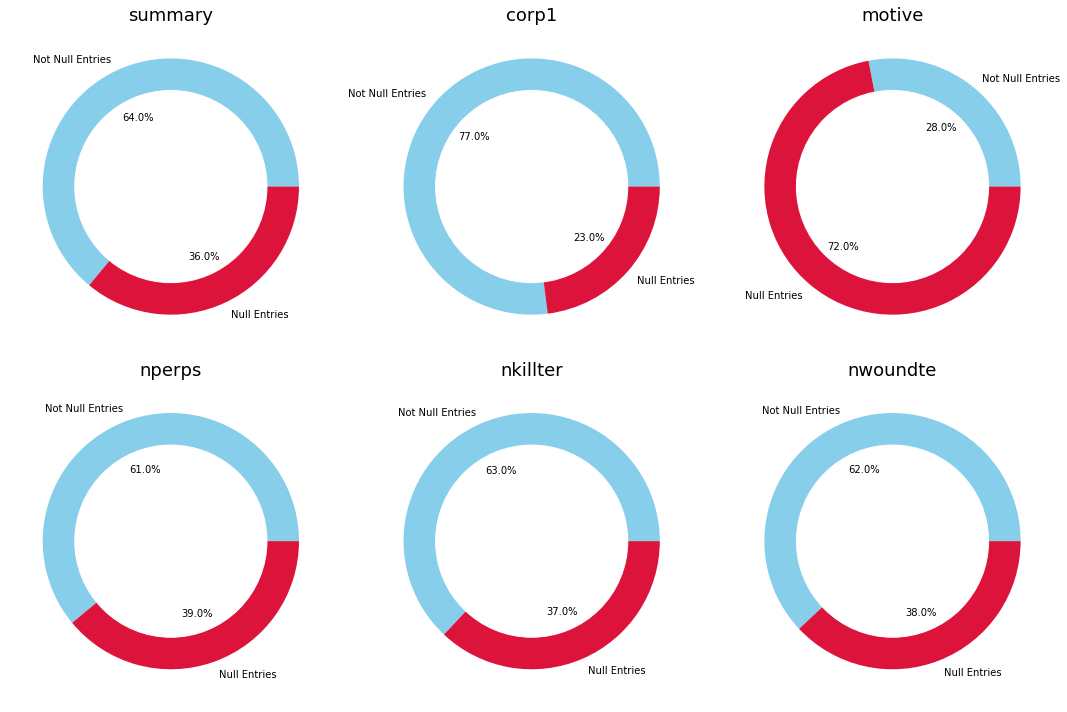

In [30]:
circles = []
for i in range(6):
    circles.append(plt.Circle((0,0), 0.75, color='white'))
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
i = 0
j = 0
k = 0
for title, size in zip(null_analysis.index, null_analysis.values):
    axs[i, j].pie((1-size, size), labels=labels, colors=colors, autopct='%1.1f%%')
    axs[i, j].set_title(title, size=18)
    p = plt.gcf()
    axs[i, j].add_artist(circles[k])
    j += 1
    k += 1
    if j == 3:
        j = 0
        i += 1
    plt.tight_layout()
plt.show()

## Categorical Entries

The third point of attention at this stage of data transformation concerns the number of categorial inputs for each attribute. This analysis is only valid if we are looking at qualitative attributes in our set. This way, we will visualize information in the metadata by filtering by attributes of the qualitative type.

In [44]:
metadata.loc[terr_data.columns].query('data_type == "qualitative"')

,data_type,importance,null_percent,n_entries
attribute,,,,
eventid,qualitative,high,0.00,181691
iyear,qualitative,high,0.00,47
imonth,qualitative,high,0.00,13
iday,qualitative,high,0.00,32
extended,qualitative,high,0.00,2
country_txt,qualitative,high,0.00,205
region_txt,qualitative,high,0.00,12
city,qualitative,high,0.00,36674
specificity,qualitative,high,0.00,5


Let's investigate whether there are qualitative attributes with some incoherent categories.

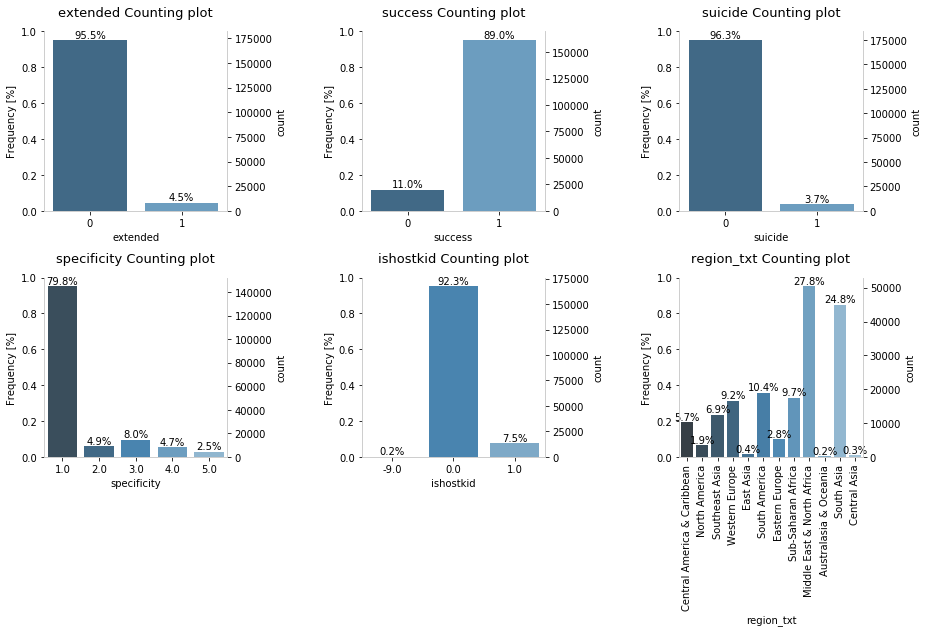

In [72]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(13, 7))
count_plot('extended', terr_data, ax=axs[0,0])
count_plot('success', terr_data, ax=axs[0,1])
count_plot('suicide', terr_data, ax=axs[0,2])
count_plot('specificity', terr_data, ax=axs[1,0])
count_plot('ishostkid', terr_data, ax=axs[1,1])
count_plot('region_txt', terr_data, ax=axs[1,2])
axs[1,2].set_xticklabels(axs[1,2].get_xticklabels(), rotation=90)
plt.show()

## Aditional Transformations

We arrived at a crucial part of the preparation: the moment when we evaluate applications of significant transformations in the data. Here we will investigate the following topics:

* Collection of data information through the `eventid` attribute or `iday`, `imonth` and `iyear`;
* Creation of a new attribute containing information of day of the week of the incident.

### Event Date Column

In [73]:
terr_data['eventid'] = terr_data['eventid'].astype(str)
terr_data['event_date'] = terr_data['eventid'].apply(lambda x: x[:4] + '/' + x[4:6] + '/' + x[6:8])
try: 
    terr_data['event_date'] = pd.to_datetime(terr_data['event_date'])
except ValueError as error:
    print(f'ValueError: {error}')

ValueError: month must be in 1..12


See that we've got an exception. Apparently some data could not be converted to the datetime type. Let's investigate.

In [74]:
terr_data['event_date'][:5]

0    1970/00/00
1    1970/00/00
2    1970/01/00
3    1970/01/00
4    1970/01/00
Name: event_date, dtype: object

Something strange has been identified: is it possible that a date has `0` values? It this a problem in the applied function for converting data or is it intrinsic to the dataset? Let's check.

In [75]:
terr_data.iloc[:5, [0, 1, 2, 3, -1]]

attribute,eventid,iyear,imonth,iday,event_date
0,197000000001,1970,7,2,1970/00/00
1,197000000002,1970,0,0,1970/00/00
2,197001000001,1970,1,0,1970/01/00
3,197001000002,1970,1,0,1970/01/00
4,197001000003,1970,1,0,1970/01/00


Actually, even in the `iday` and `imonth` columns we have entries identifying day `0`. The appropriate way (perhaps not the most correct) to solve this situation is to add a day in days with input 0. 

In [77]:
# Days higher than 31 are not correct too
len(terr_data.query('iday > 31'))

0

In [79]:
# months higher than 12?
len(terr_data.query('imonth > 12'))

0

Apparently, it is safer to perform this date transformation using the `iyear`, `imonth` and `iday` columns, given that no inconsistency (other than days and months = 0) has been found.

In [80]:
# Applying transformations
terr_data['iday'] = terr_data['iday'].apply(lambda day: day + 1 if day == 0 else day)
terr_data['imonth'] = terr_data['imonth'].apply(lambda month: month + 1 if month == 0 else month)
print((terr_data['iday'] == 0).any())
print((terr_data['imonth'] == 0).any())

False
False


In [81]:
year = terr_data['iyear'].astype(str)
month = terr_data['imonth'].astype(str)
day = terr_data['iday'].astype(str)
terr_data['event_date'] = year + "/" + month + "/" + day
terr_data['event_date'] = pd.to_datetime(terr_data['event_date'])
terr_data.iloc[:5, np.r_[:3, -1]]

attribute,eventid,iyear,imonth,event_date
0,197000000001,1970,7,1970-07-02
1,197000000002,1970,1,1970-01-01
2,197001000001,1970,1,1970-01-01
3,197001000002,1970,1,1970-01-01
4,197001000003,1970,1,1970-01-01


In [82]:
terr_data['event_date'].dtype

dtype('<M8[ns]')

Excellent!

### Day of Week Column

With the creation of the `event_date` column of datetime type, the path to creating a new `day_of_week` column is quite simple. Remembering that in this Python approach, Monday = 0 and Sunday = 6.

In [83]:
terr_data['day_of_week'] = terr_data['event_date'].apply(lambda x: x.dayofweek)
terr_data['day_of_week_name'] = terr_data['event_date'].dt.day_name()
terr_data.iloc[:10, np.r_[:3, -3, -2, -1]]

attribute,eventid,iyear,imonth,event_date,day_of_week,day_of_week_name
0,197000000001,1970,7,1970-07-02,3,Thursday
1,197000000002,1970,1,1970-01-01,3,Thursday
2,197001000001,1970,1,1970-01-01,3,Thursday
3,197001000002,1970,1,1970-01-01,3,Thursday
4,197001000003,1970,1,1970-01-01,3,Thursday
5,197001010002,1970,1,1970-01-01,3,Thursday
6,197001020001,1970,1,1970-01-02,4,Friday
7,197001020002,1970,1,1970-01-02,4,Friday
8,197001020003,1970,1,1970-01-02,4,Friday
9,197001030001,1970,1,1970-01-03,5,Saturday


# Conclusion

The research and analysis applied to the dataset Global Terrorism served as inspiration for the implementation of future analyzes already mentioned in the introduction of this notebook. The transformations carried out allow us to conclude that the initial objective was reached and the data were prepared to be worked on for the generation of insights through visualizations.

In a second notebook, these same data will be used in a different way: generating visualizations and graphical analysis.